In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings

filterwarnings(action="ignore")

In [2]:
# Load the Iris dataset
df = pd.read_csv("Iris-dataset.csv")

In [3]:
# Display basic information about the dataset
print(df.info())
print(df.shape)
print(df.head())
print(df.describe())
print(df.isnull().sum())
print(df["Species"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
(150, 5)
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000

In [4]:
# Print the range of each feature
feature_ranges = df.agg(
    {
        "SepalLengthCm": ["min", "max"],
        "SepalWidthCm": ["min", "max"],
        "PetalLengthCm": ["min", "max"],
        "PetalWidthCm": ["min", "max"],
    }
)

print("\nRange of Features:")
print(feature_ranges)


Range of Features:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
min            4.3           2.0            1.0           0.1
max            7.9           4.4            6.9           2.5


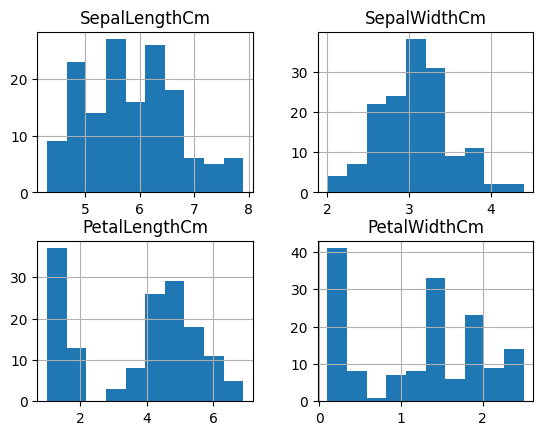

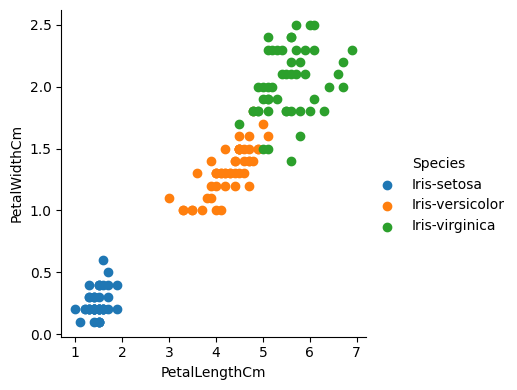

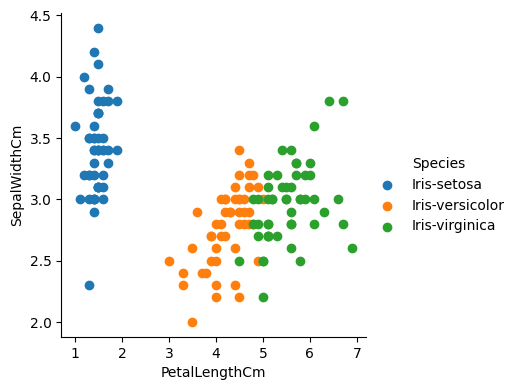

In [5]:
# Visualize the dataset
df.hist()
sns.FacetGrid(df, hue="Species", height=4).map(
    plt.scatter, "PetalLengthCm", "PetalWidthCm"
).add_legend()
sns.FacetGrid(df, hue="Species", height=4).map(
    plt.scatter, "PetalLengthCm", "SepalWidthCm"
).add_legend()

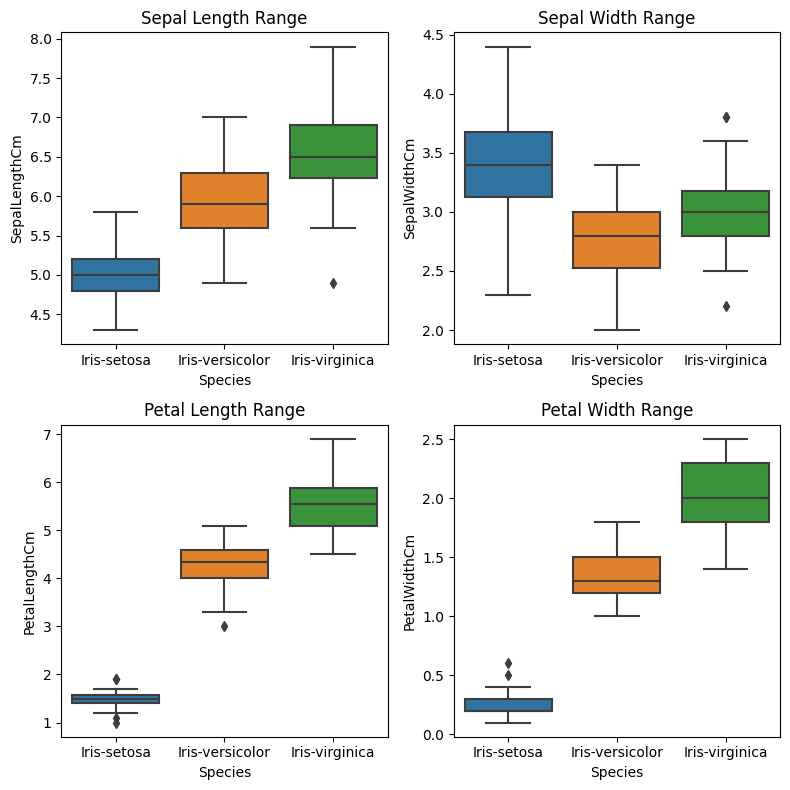

In [6]:

# Visualize the range of features using boxplots
plt.figure(figsize=(8, 8))

# Boxplot for Sepal Length
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="SepalLengthCm", data=df)
plt.title("Sepal Length Range")

# Boxplot for Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="SepalWidthCm", data=df)
plt.title("Sepal Width Range")

# Boxplot for Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
plt.title("Petal Length Range")

# Boxplot for Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="PetalWidthCm", data=df)
plt.title("Petal Width Range")

plt.tight_layout()
plt.show()

In [7]:
# Prepare data for training
y = df["Species"]
X = df.drop("Species", axis=1)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel="rbf", C=1.0, gamma="scale", random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0),
}

In [11]:
# Evaluate each classifier using cross-validation and on the test set
for clf_name, clf in classifiers.items():
    # Cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print(f"\n{clf_name} -> Cross-Validation Accuracy: {scores.mean()} ")

    # Train the classifier on the entire training set
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the performance of the classifier on the test set
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"{clf_name} -> Test Set Accuracy: {accuracy * 100}%")


Logistic Regression -> Cross-Validation Accuracy: 0.9523809523809523 
Logistic Regression -> Test Set Accuracy: 97.77777777777777%

k-Nearest Neighbors -> Cross-Validation Accuracy: 0.9523809523809523 
k-Nearest Neighbors -> Test Set Accuracy: 97.77777777777777%

Support Vector Machine -> Cross-Validation Accuracy: 0.9523809523809523 
Support Vector Machine -> Test Set Accuracy: 97.77777777777777%

Decision Tree -> Cross-Validation Accuracy: 0.9428571428571428 
Decision Tree -> Test Set Accuracy: 97.77777777777777%

Random Forest -> Cross-Validation Accuracy: 0.9428571428571428 
Random Forest -> Test Set Accuracy: 97.77777777777777%

Naive Bayes -> Cross-Validation Accuracy: 0.9428571428571428 
Naive Bayes -> Test Set Accuracy: 100.0%

Neural Network -> Cross-Validation Accuracy: 0.9428571428571428 
Neural Network -> Test Set Accuracy: 97.77777777777777%


In [12]:
# Choose the best-performing classifier
best_classifier_name = max(
    classifiers,
    key=lambda k: cross_val_score(
        classifiers[k], X_train, y_train, cv=5, scoring="accuracy"
    ).mean(),
)
best_classifier = classifiers[best_classifier_name]

In [13]:
# Train the best classifier on the entire training set
best_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Evaluate the performance of the best classifier
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [15]:
# Print results
print(f"\nBest Classifier: {best_classifier_name}")
print("Confusion Matrix:")
print(cm)
print(f"Accuracy of the Model: {accuracy * 100}%")


Best Classifier: Logistic Regression
Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy of the Model: 97.77777777777777%


In [16]:
# k-fold cross-validation for the best classifier
kf = KFold(n_splits=6, shuffle=True, random_state=0)
cv_scores = cross_val_score(
    best_classifier, X, y, cv=kf, scoring=make_scorer(accuracy_score)
)

In [17]:
# Print the cross-validation scores for each fold
print("\nCross-Validation Scores for Best Classifier:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score}")


Cross-Validation Scores for Best Classifier:
Fold 1: 1.0
Fold 2: 0.96
Fold 3: 0.92
Fold 4: 1.0
Fold 5: 1.0
Fold 6: 0.92


In [18]:
# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9666666666666667


Range of Features:
|               | SepalLengthCm | SepalWidthCm | PetalLengthCm | PetalWidthCm |
| ------------- | ------------- | ------------ | ------------- | ------------ |
| **Min**       | 4.3           | 2.0          | 1.0           | 0.1          |
| **Max**       | 7.9           | 4.4          | 6.9           | 2.5          |



In [19]:
# Take user input for feature values
sepal_length = float(input("Enter Sepal Length (in cm): "))
sepal_width = float(input("Enter Sepal Width (in cm): "))
petal_length = float(input("Enter Petal Length (in cm): "))
petal_width = float(input("Enter Petal Width (in cm): "))

In [20]:
# Create a DataFrame with user input
user_input = pd.DataFrame(
    {
        "SepalLengthCm": [sepal_length],
        "SepalWidthCm": [sepal_width],
        "PetalLengthCm": [petal_length],
        "PetalWidthCm": [petal_width],
    }
)

In [21]:
# Standardize the user input using the same scaler
user_input_scaled = scaler.transform(user_input)

# Use the best classifier to predict the class
predicted_class = best_classifier.predict(user_input_scaled)[0]

In [22]:
print(f"\nPredicted Class: {predicted_class}")


Predicted Class: Iris-setosa
